## **README**

Submission for Assignment 0\
Name: Hieu Nghiem\
CWID: A20171926

- First block of code is for importing libraries
- Make sure to copy two input files named 'input.png' and 'test.txt' to the same folder as the ipynb notebook before running

In [5]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os


**Question 1**

In  this  part  of  the  assignment,  you  will  work  with  file  I/O  operations, 
dictionaries, Numpy arrays and visualization with Matplotlib. You will write a 
simple Python script that will read a file named test.txt. You can hard 
code  this  into  your  program  for  convenience.  A  sample  file  is  given  on 
Canvas for your reference. Your program should read a text file and print a 
histogram of the letters present in the document. The code must have the 
histogram as both a dictionary, where the keys are letters and the values are 
the corresponding frequencies, as well as a Numpy array, where each index 
corresponds  to  a  letter  in  alphabetical  order.  For  example,  the  letter  ‘a’ 
corresponds to index 0, ‘b’ to index 1, etc.  
 
An example of a histogram for a line is given below:  
  
Input: The quick brown fox jumps over the lazy dog  
Output: {'a': 1, 'b': 1, 'c': 1, 'd': 1, 'e': 3, 'f': 1, 
'g': 1, 'h': 2,  
'i': 1, 'j': 1, 'k': 1, 'l': 1, 'm': 1, 'n': 1, 'o': 4, 
'p': 1, 'q': 1, 'r':  
2, 's': 1, 't': 2, 'u': 2, 'v': 1, 'w': 1, 'x': 1, 'y': 
1, 'z': 1} 
 
Given  the  computed  histogram,  create  two  bar  graphs.  In  the  first,  the 
frequencies should be normalized i.e., the frequencies will sum to 1. In the 
second,  they  should  be  unnormalized.  Make  sure  to  generate  titles 
appropriately for the graph and the axes. Display the plots to the user along 
with printing the histogram(s).


Dictionary for frequency of the letters:  {'a': 44, 'b': 24, 'c': 23, 'd': 30, 'e': 63, 'f': 22, 'g': 23, 'h': 25, 'i': 56, 'j': 23, 'k': 22, 'l': 26, 'm': 22, 'n': 28, 'o': 50, 'p': 25, 'q': 22, 'r': 40, 's': 25, 't': 36, 'u': 38, 'v': 22, 'w': 22, 'x': 22, 'y': 27, 'z': 23}


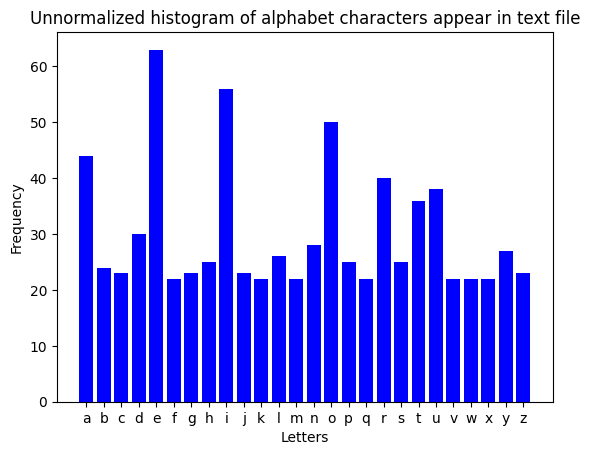

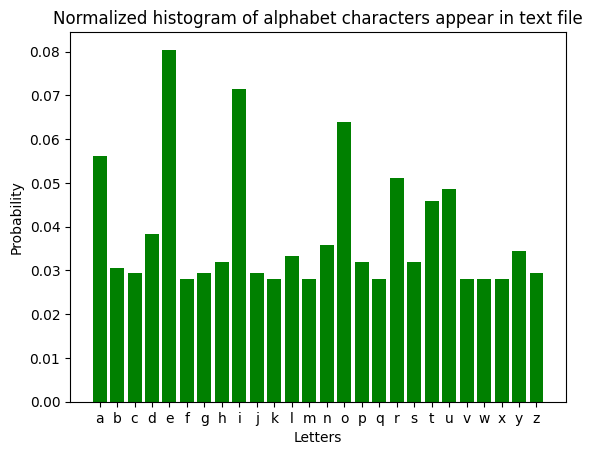

In [6]:
#Text processing: read txt file, lower case all letters, trimming spaces,
#,newline, commas and sorted by alphabet
file = open('./test.txt', 'r')
text = file.read().lower()
text = text.replace(' ','')
text = text.replace('\n','')
text = text.replace(',','')
final_text = ''.join(sorted(text))

def count_char(x):
  freq = {}
  for i in x:
    keys = freq.keys()
    if i in keys:
      freq[i] += 1
    else:
      freq[i] = 1
  return freq

histogram1 = count_char(final_text)
histogram2 = np.array(sorted(final_text))

print('Dictionary for frequency of the letters: ', histogram1)
# print(histogram2)



sum_prob = sum(histogram1.values())
list_prob = list(histogram1.values())
prob = []
for j in list_prob:
   prob.append(j/sum_prob)


plt.bar(histogram1.keys(), histogram1.values(), align = 'center', color='b')
plt.title('Unnormalized histogram of alphabet characters appear in text file')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.show()

plt.bar(histogram1.keys(), prob, align = 'center', color='g')
plt.title('Normalized histogram of alphabet characters appear in text file')
plt.xlabel('Letters')
plt.ylabel('Probability')
plt.show()


# plt.hist(histogram2, density=True)
# plt.title('Normalized histogram of alphabet characters appear in text file')
# plt.xlabel('Letters')
# plt.ylabel('Probability')
# plt.show()

**Question 2**

In this part of the assignment, you will be working with arrays using NumPy. 
You will be working with an image (test.png) that was provided on Canvas 
for convenience. You can read the image using OpenCV (installed by default 
on Colab) as follows. 
 
import cv2   
img = cv2.imread(‘input.png’)   
 
Perform the following operations: 
1.  For  each  pixel  in  the  image,  i.e.,  every  element  in  the  array  img, 
compute the Euclidean distance to the following points [255, 0, 0], [0, 
255, 0] and [0, 0, 255]. Once computed, set the value of the pixel to 
the point with the least distance. Save the image as output1.png  
2.  Set the pixels that fall within a square (whose sides are of length 50) 
at  the  center  of  the  image  to  be  [0,0,0].  Save  the  image  as 
output2.png. 

In [3]:
img1 = cv2.imread('input.png')
img2 = cv2.imread('input.png')

rows,cols,_ = img1.shape

#Question 1:

for i in range(rows):
    for j in range(cols):
        m1 = np.linalg.norm(img1[i,j] - [255, 0, 0])
        m2 = np.linalg.norm(img1[i,j] - [0, 255, 0])
        m3 = np.linalg.norm(img1[i,j] - [0, 0, 255])
        if m1 <= m2 and m1 <= m3:
            img1[i,j] = [255,0,0]
        if m2 <= m1 and m2 <= m3:
            img1[i,j] = [0,255,0]  
        if m3 <= m1 and m3 <= m2:
            img1[i,j] = [0,0,255]
cv2.imwrite('output1.png', img1)

print('Please check output1.png generated')
#Question 2:
#select 50 pixel in the middle of x axis and 50 pixel in middle of y axis
#to form a 50x50 square in the middle of 128x128 image - x1,x2 are the indices
#for x axis and y1,y2 are the indices for y axis

x1 = int(rows/2-50/2)
x2 = int(rows/2+50/2)
y1 = int(cols/2-50/2)
y2 = int(cols/2+50/2)
img2[x1:x2, y1:y2] = [0,0,0]
cv2.imwrite('output2.png', img2)

print('Please check output2.png generated')



Please check output1.png generated
Please check output2.png generated


**QUESTION 3**

You and a friend go to buy tacos. You get three soft tacos 
and  three  burritos  and  your  total  bill  is  $11.25.  Your 
friend's  bill  is  $10.00  for  four  soft  tacos  and  two 
burritos. How much do soft tacos cost? How much do burritos 
cost? 

In [4]:
# Solving systems of equations

# Columns of a are variable coefficients, rows are individual equations
a = np.array([[3,3], [4,2]])

# Column vector of equation equalities
b = np.array([[11.25],[10]])
# Check to ensure matrix is nonsingular
print('Ensure the matrix is nonsingular, det of matrix =', np.linalg.det(a))

# Solve
c = np.linalg.solve(a, b)

print('A soft taco costs: ', c[0])
print('A burrito costs: ',c[1])

Ensure the matrix is nonsingular, det of matrix = -6.0
A soft taco costs:  [1.25]
A burrito costs:  [2.5]
